# Data Scientist Professional Practical Exam

### Company Background

1nn the Neighborhood is an online platform that allows people to rent out their properties for short stays. At the moment, only 2% of people who come to the site interested in renting out their homes start to use it.

The product manager would like to increase this. They want to develop an application to help people estimate how much they could earn renting out their living space. They hope that this would make people more likely to sign up.



### Customer Question

The product manager would like to know:
- Can you develop a way to predict how much someone could earn from renting their property that could power the application?




### Success Criteria

They want to avoid estimating prices that are more than 25 dollars off of the actual price, as this may discourage people.


### Dataset

The data you will use for this analysis can be accessed here: `"data/data.csv"`

![1nn_neighborhood](1nn_neighborhood.jpeg)


# Introduction of the study

Given the subject of this project, we clearly identified that we will have to develop a supervised learning regression model to predict the price of future rented house on our online platform 1nn the Neighborhood. Therefore Target variable of the study will be the price of rented properties and explanatory variable will be all the features of those rented properties. Our main goal is to produce a model which avoid estimating prices that are more than 25 dollars off of the actual price. We also remind that our platform is designed for **individuals** who want to rent their **own** properties for **short** stays only.<br><br>
The analysis and model development will consist of the following steps:
- Explore the data and perform cleaning action if necessary.
- Perform an Exploratory Data Analysis to identify trends, associations and issues in the data
- Train test and evaluate different regression model performance and compare them each other. 
- Review model performance by comparing it to business goals
- Consider improvement opportunities

Let's begin by importing necessary packages for data validation.

In [1]:
# Import necessary packages for data validation
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis
from statsmodels.api import qqplot

# Defining type of plot for the entire study 
import matplotlib.style as style
plt.style.use('ggplot')
sns.set(font_scale=1)


# Data Validation

### Basic tests

With this new dataset, I carried out basics tests in order to inspect the dataset.

In [2]:
# Import csv file
df_rentals = pd.read_csv("data/data.csv")
# Print first few rows of the dataframe
print(df_rentals.head(10))
# Print data type for each column
print(df_rentals.info())
# Check for columns with NaN values
print(f"Columns containing NaN values : {[col for col in df_rentals.columns if df_rentals[col].isnull().values.any()]}")

      id  latitude  longitude  ... bedrooms minimum_nights     price
0    958  37.76931 -122.43386  ...      1.0              1  $170.00 
1   3850  37.75402 -122.45805  ...      1.0              1   $99.00 
2   5858  37.74511 -122.42102  ...      2.0             30  $235.00 
3   7918  37.76669 -122.45250  ...      1.0             32   $65.00 
4   8142  37.76487 -122.45183  ...      1.0             32   $65.00 
5   8339  37.77525 -122.43637  ...      2.0              6  $875.00 
6   8739  37.75919 -122.42237  ...      1.0              1  $139.00 
7   9225  37.76259 -122.40543  ...      1.0              1  $135.00 
8  10251  37.75874 -122.41327  ...      2.0             30  $225.00 
9  10578  37.79143 -122.41544  ...      0.0             30  $120.00 

[10 rows x 9 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8111 entries, 0 to 8110
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              8

### Cleaning actions

Given those information, I clearly identified some actions to conduct before using the data for our model development: 

- Use the column ID of our dataframe as index. Test uniqueness of ID before indexing.

- Look for duplicated rows and check if duplicated rows make sense or not.

- Bathrooms and bedrooms columns must be integer instead of float in order to optimize memory use. Moreover those two columns contains NaN values. If there are few rows with those NaN values, we should drop them.

- Given dataframe's first lines, property_type and room_type columns can be convert to categorical variable. Before converting this data into categorical variable, I must ensure that unique values in the column are really unique value and cannot be gather into one category.

- Price is an object (i.e. string) column. In order to use the price column as response variable I must convert it to float type. After few attempt I indentify few actions to conduct before converting it to float type:
   - Remove caracters \" and $
   - Change the thousand separator "," into "."



In [3]:
#Replace ID column as index
if len(df_rentals["id"].unique()) == df_rentals.shape[0]:
	df_rentals.set_index("id",inplace = True)
    
# Check for duplicated rows if existing 
print(df_rentals[df_rentals.duplicated(keep=False)])
# Only one duplicated row that we decide to drop
df_rentals.drop(df_rentals[df_rentals.duplicated()].index, inplace = True)

# Print NaN values for bathrooms and bedrooms columns
print(f"Number of rows where Bedrooms = Nan : {df_rentals['bedrooms'].isna().sum()}")
print(f"Number of rows where Bathrooms = Nan : {df_rentals['bathrooms'].isna().sum()}")
# Drop those rows as it only concerns 16 rows
df_rentals.dropna(axis = 0, how = 'any', inplace = True)

# Check for unique values in those columns
print(f"Unique values of column 'bedrooms' : {df_rentals['bedrooms'].unique()}")
print(f"Unique values of column 'bathrooms' : {df_rentals['bathrooms'].unique()}")
#Convert only bedroom column into integer because bathrooms contains float values
df_rentals['bedrooms'] = df_rentals['bedrooms'].astype('int')

# Convert property_type and room_type columns into categorical variable
df_rentals['property_type'] = df_rentals['property_type'].astype("category")
df_rentals['room_type'] = df_rentals['room_type'].astype("category")

# Remove characters that's not a digit, comma or point ([^\d,.]) and then replace the thousand separator "," with ""
df_rentals["price"] = df_rentals["price"].str.replace('[^\d,.]', '').str.replace(',', '')
df_rentals["price"] = df_rentals["price"].astype("float")

# Verification on datatype 
print(df_rentals.info())

          latitude  longitude  ... minimum_nights     price
id                             ...                         
34931081  37.78941  -122.4066  ...              5  $199.00 
34931105  37.78941  -122.4066  ...              5  $199.00 

[2 rows x 8 columns]
Number of rows where Bedrooms = Nan : 4
Number of rows where Bathrooms = Nan : 12
Unique values of column 'bedrooms' : [ 1.  2.  0.  3.  4.  5.  6. 14.  7.  8.]
Unique values of column 'bathrooms' : [ 1.   4.   1.5  2.   3.   0.   2.5  3.5  0.5  6.5 10.   4.5 14.   8.
  5.   6.   7. ]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8094 entries, 958 to 39354181
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   latitude        8094 non-null   float64 
 1   longitude       8094 non-null   float64 
 2   property_type   8094 non-null   category
 3   room_type       8094 non-null   category
 4   bathrooms       8094 non-null   float64 
 5   bedrooms     

### Visualisations of variable distribution

After cleaning the dataset, we try to look for outliers or out of scope  data points by checking the distribution of the each variable. We use count plot for categorical and discrete variable and kdeplot (density distribution) for continuous numerical variable.

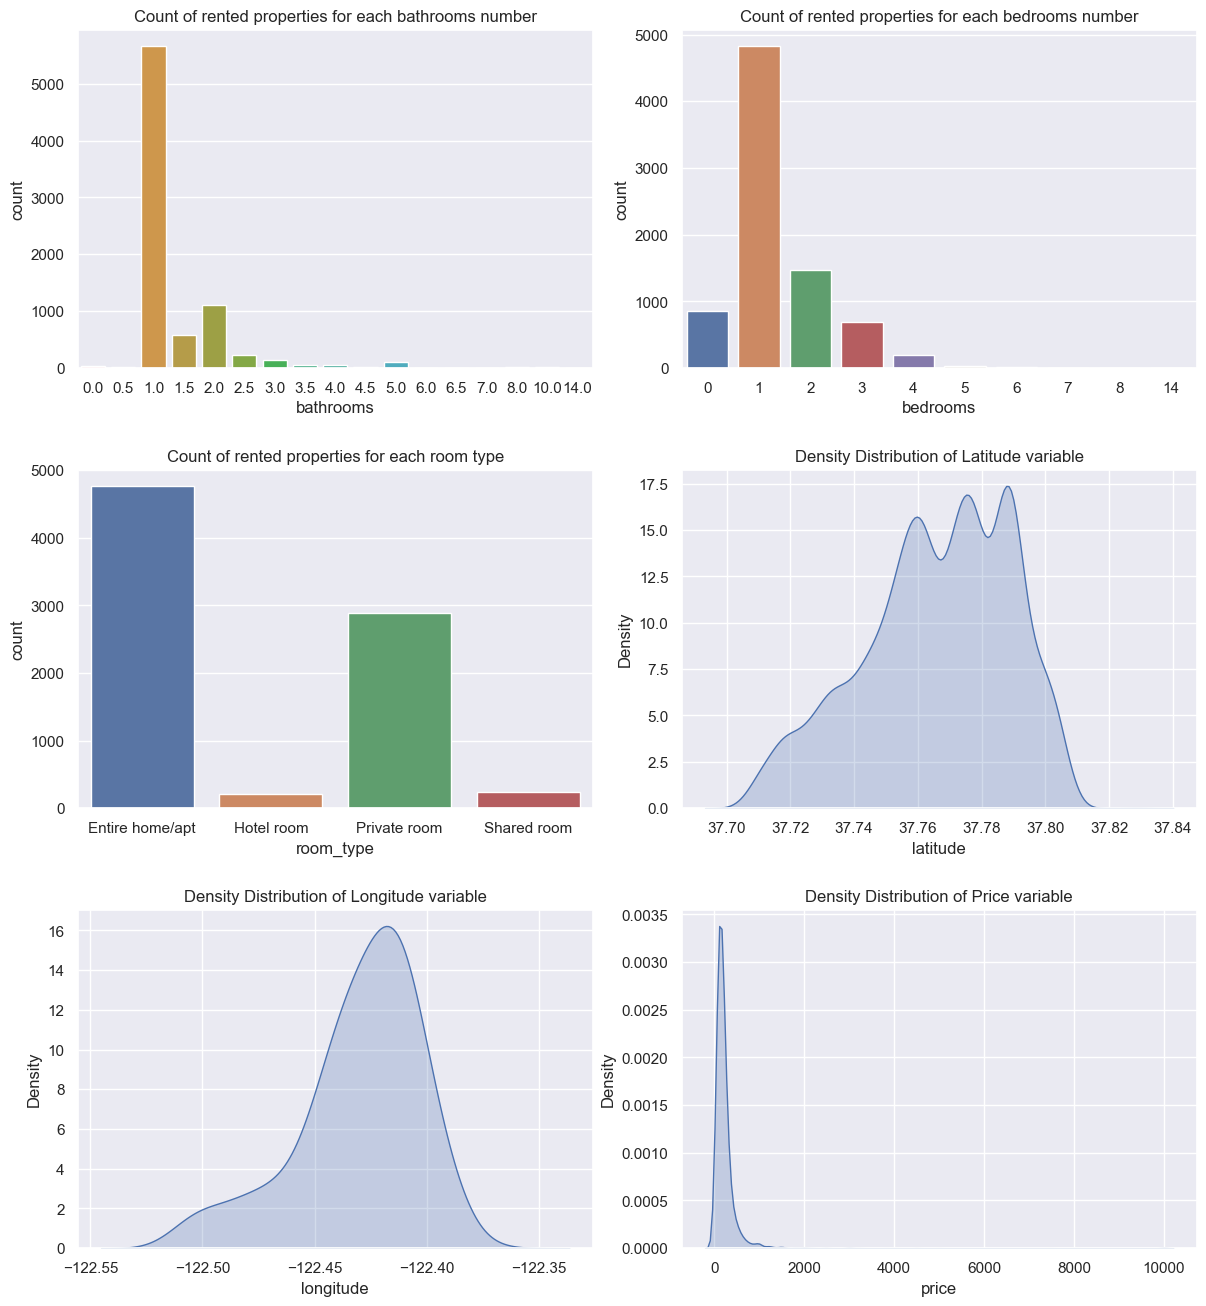

In [4]:
fig, ax = plt.subplots(3,2, figsize=(12,13))
ax[0,0] = sns.countplot(data=df_rentals, x='bathrooms', ax=ax[0,0]).set(title='Count of rented properties for each bathrooms number')
ax[0,1] = sns.countplot(data=df_rentals, x='bedrooms', ax=ax[0,1]).set(title='Count of rented properties for each bedrooms number')
ax[1,0] = sns.countplot(data=df_rentals, x='room_type', ax=ax[1,0]).set(title='Count of rented properties for each room type')
ax[1,1] = sns.kdeplot(data=df_rentals, x='latitude', fill=True, ax=ax[1,1]).set(title='Density Distribution of Latitude variable')
ax[2,0] = sns.kdeplot(data=df_rentals, x='longitude',bw_adjust=2.4, fill=True, ax=ax[2,0]).set(title='Density Distribution of Longitude variable')
ax[2,1] = sns.kdeplot(data=df_rentals, x='price', fill=True, ax=ax[2,1]).set(title='Density Distribution of Price variable')
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0)


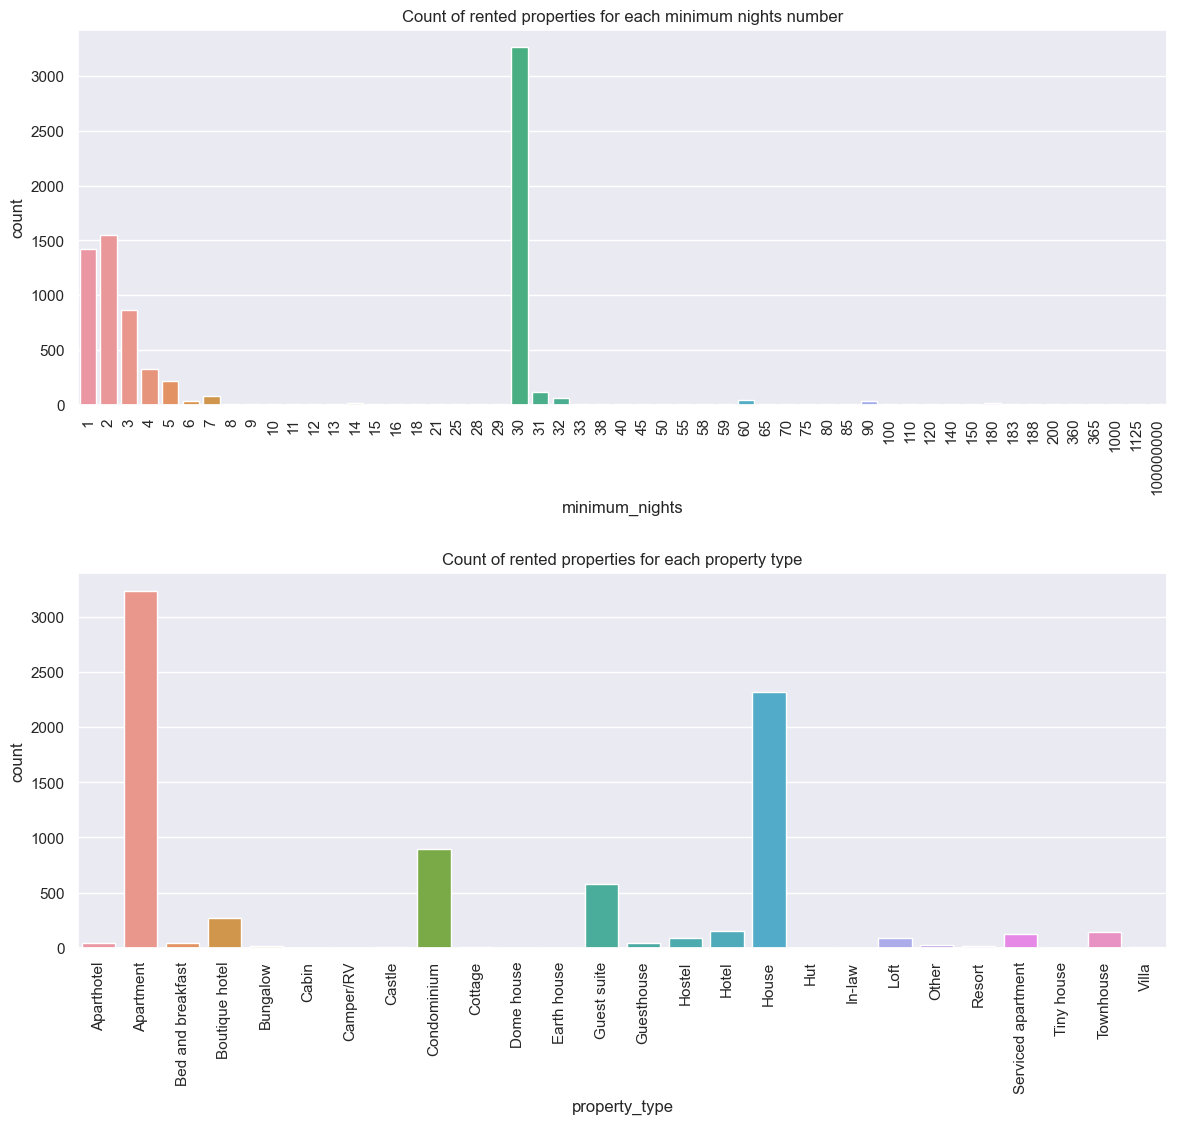

In [5]:
fig, ax = plt.subplots(2,1, figsize=(12,10))
ax[0] = sns.countplot(data=df_rentals, x='minimum_nights', fill=True, ax=ax[0]).set(title='Count of rented properties for each minimum nights number')
ax[1] = sns.countplot(data=df_rentals, x='property_type', fill=True, ax=ax[1]).set(title='Count of rented properties for each property type')
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=6.0)
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90);

Given those visualisations, we can say :
- minimum_nights have outliers we must check before conducting our analysis given the fact the scope of our study only concerns **short stays**.
- property_type have a lot of categories in which some corresponds to professional renting. In particular there is hotel, hostel, boutique hotel, bed and breakfast etc... We will inspect professional renters from our dataset as it's not include in the scope of our study. Our model developement should only concerns people who rent out their own properties for short stays.
- bedrooms distribution looks fine.
- bathrooms distribution is very spread out and we cannot explain why there is some properties which propose more bathrooms than bedrooms. It might be related to professional renting, we will inspect this point below.
- latitude and longitude distribution are fine, all properties in the dataframe correspond to the same neighborhood. **Welcome to San Francisco.**
- price variable would be our target variable for this study. From density distribution of price variable, we can see there is a longer right tail so the data is rightly skewed. Therefore, we will apply log transformation on price variable, and check if the distribution on a log scale is closer to normal distribution


### Minimum_nights variable

In order to estimate how we should define outliers for minimum_nights variable, we first calculate lower fence and upper fence with IQR method

In [6]:
# Define a fonction for IQR method, will be re-use for price variable
def define_outliers(df,column_name,log_scale = False):
	q1,q3 = df[column_name].quantile([0.25, 0.75])
	iqr = q3-q1
	upper_fence = q3 + (1.5 * iqr)
	lower_fence = q1 - (1.5 * iqr)
	print(f"For column {column_name} of the dataframe :")
	print(f"Upper fence = {upper_fence} & Lower fence = {lower_fence}")
	if log_scale :
		upper_fence_exp = np.exp(upper_fence)
		lower_fence_exp = np.exp(lower_fence)
		print(f"Upper fence without log scale = {upper_fence_exp} & Lower fence without log scale = {lower_fence_exp}")
	number_drop_row = len(df[(df[column_name] > upper_fence) | (df[column_name]< lower_fence)])
	print("Number of datapoints to be drop : {}\nPourcentage of row deletion {}%\n".format(number_drop_row, np.round((number_drop_row/df.shape[0])*100,decimals = 3)))
	return lower_fence,upper_fence

define_outliers(df_rentals,"minimum_nights")

# Print Information for an outlier limit of 30 days for columns minimum_nights
print("For information, if we consider an upper fence of 31 days (short stays) for minimum_nights columns :") 
number_drop_row = len(df_rentals[df_rentals["minimum_nights"] > 31])
print("Number of datapoints to be drop : {}\nPourcentage of row deletion {}%\n".format(number_drop_row, np.round((number_drop_row/df_rentals.shape[0])*100,decimals = 3)))

For column minimum_nights of the dataframe :
Upper fence = 72.0 & Lower fence = -40.0
Number of datapoints to be drop : 83
Pourcentage of row deletion 1.025%

For information, if we consider an upper fence of 31 days (short stays) for minimum_nights columns :
Number of datapoints to be drop : 198
Pourcentage of row deletion 2.446%



For minimum_nights outliers, we have an outlier limit (defined with IQR method) of 72 nights which concerns 80 records (i.e 1% of our data). However 72 nights still not correspond to short stays which is clearly the scope for our study. So we decide to arbitrary lower outlier limit for minimum nights to 31 days (1 months). The limit of 31 days will drop 2.5% of the data instead of 1% with a limit of 72 days so we consider it will not have significant impact on our study.
We will also inform the product manager that our tool will not be usable for stays greater than 1 month.

In [7]:
# Dropping rows defined as outliers above
df_rentals.drop(df_rentals[(df_rentals["minimum_nights"] > 31)].index,inplace =True)

### Property_type variable
For bathrooms variable we find suspicious that some properties offer more bathrooms than bedrooms. We suspect it is related to professionnal renters. We propose to look what is property_type for rented properties which have more than 5 bathrooms.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, 'Aparthotel'),
  Text(1, 0, 'Apartment'),
  Text(2, 0, 'Bed and breakfast'),
  Text(3, 0, 'Boutique hotel'),
  Text(4, 0, 'Bungalow'),
  Text(5, 0, 'Cabin'),
  Text(6, 0, 'Camper/RV'),
  Text(7, 0, 'Castle'),
  Text(8, 0, 'Condominium'),
  Text(9, 0, 'Cottage'),
  Text(10, 0, 'Dome house'),
  Text(11, 0, 'Earth house'),
  Text(12, 0, 'Guest suite'),
  Text(13, 0, 'Guesthouse'),
  Text(14, 0, 'Hostel'),
  Text(15, 0, 'Hotel'),
  Text(16, 0, 'House'),
  Text(17, 0, 'Hut'),
  Text(18, 0, 'In-law'),
  Text(19, 0, 'Loft'),
  Text(20, 0, 'Other'),
  Text(21, 0, 'Resort'),
  Text(22, 0, 'Serviced apartment'),
  Text(23, 0, 'Tiny house'),
  Text(24, 0, 'Townhouse'),
  Text(25, 0, 'Villa')])

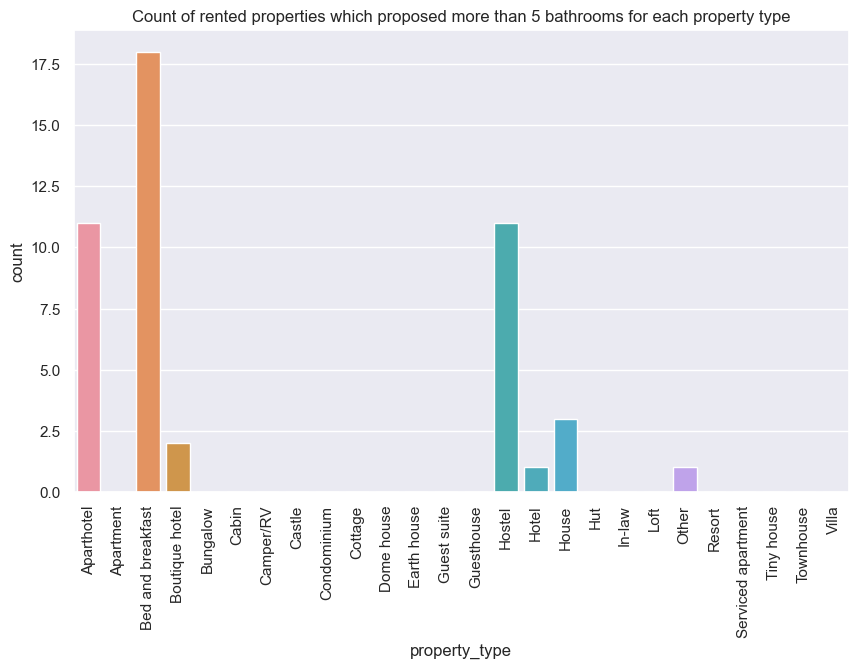

In [8]:
plt.figure(figsize=(10, 6))
df_temp = df_rentals[df_rentals["bathrooms"] > 5]
sns.countplot(data=df_temp, x='property_type').set(title='Count of rented properties which proposed more than 5 bathrooms for each property type')
plt.xticks(rotation=90)

With this chart, we clearly see that renters which propose more than 5 bathrooms are mostly professionals : ApartHotel, Bed and BreakFast, Boutique hotel, Hostel and Hotel.
As the scope of our study is to develop a tool for unporfessional renters who want to rent their own property, we propose to drop rows corresponding to professional renter as listed above. First we have to check how many rows it concerns.

In [9]:
professional_renter = ["Aparthotel","Bed and breakfast","Boutique hotel","Hostel","Hotel"]
number_drop_row = len(df_rentals[df_rentals["property_type"].isin(professional_renter)])
print("Number of datapoints to be drop : {}\nPourcentage of row deletion {}%".format(number_drop_row, np.round((number_drop_row/df_rentals.shape[0])*100,decimals = 3)))

Number of datapoints to be drop : 557
Pourcentage of row deletion 7.054%


As this drop concerns about 550 rows (i.e 7% of the dataframe) which is quite important, we decide to keep professional renter records even if those renters are clearly not in the scope of our study.<br>
During our study, we have try to drop those rows, but it have tends to decrease model performance so we must keep it.

### Bathrooms variable

For bathrooms variable, we now want to check why some properties propose more bathrooms than bedrooms. By manually inspecting the data, we see that when property have 4 bathrooms or more it is often for a rented property which only proposed 1 bedrooms. We don't want to include those data for the tool we develop as number of bathrooms for those row is not representative of the price proposed on the platform.
We first have to check how many rows it concerns before dropping it.

                     mean_price  count_rows
bedrooms bathrooms                         
0        1.0         146.695181         830
         1.5         179.500000           4
         2.0         463.000000           3
         8.0          70.000000           4
1        1.0         181.903286        3774
         1.5         164.284810         316
         2.0         123.101626         246
         2.5          64.054795          73
         3.0          52.714286          42
         3.5          44.500000          10
         4.0          89.268293          41
         5.0          86.234234         111
         6.0          51.250000           8
         7.0         199.000000           5
         8.0          74.800000          10
         10.0         87.000000          19
2        1.0         238.348808         797
         1.5         298.103226         155
         2.0         340.428571         448
         2.5         443.125000          32
         3.0         427.428571 

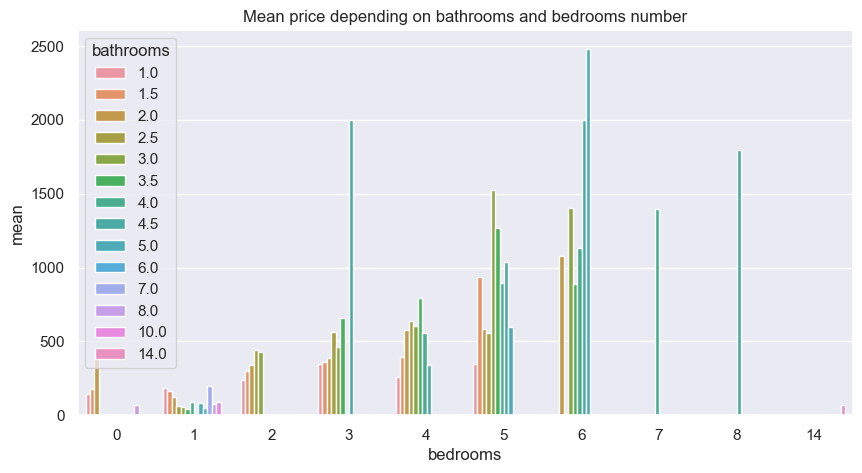

In [10]:
# Manual data inspection
df_groupby = df_rentals[df_rentals["bathrooms"]>=1].groupby(["bedrooms","bathrooms"])["price"].agg(['mean','count'])
print(df_groupby.rename(columns={'mean':'mean_price','count' : 'count_rows'}))

# Visualisation to demonstrate inconsistency 
df_groupby.reset_index(inplace = True)
df_one_bedroom = df_groupby[df_groupby["bedrooms"] == 1]
plt.figure(figsize=(10, 5))
sns.barplot(data=df_groupby, x='bedrooms',y="mean",hue = "bathrooms").set(title='Mean price depending on bathrooms and bedrooms number');

# Count of dropped row for rented properties with 1 bedroom and strictly greater than 2
number_drop_row = len(df_rentals[(df_rentals["bathrooms"] > 2) & (df_rentals["bedrooms"]==1)])
print("\nNumber of datapoint to be drop : {}\nPourcentage of row deletion {}%\n".format(number_drop_row,np.round((number_drop_row/df_rentals.shape[0])*100,decimals = 3)))


With this table, we understand that when property proposed 1 bedroom and more than 2 bathrooms, number of bathrooms proposed is not representative of rented price. For example mean price for 1 bedroom and 2 bathrooms is about 125\$ whereas mean price for 1 bedroom and more than 2 bathrooms is always between 40\$ And 90\$.<br>With the visualisation we can see that rented properties which propose more bathrooms for the same number of bedrooms have an higher price. This is true for rented properties which propose more than 2 bedrooms and it's the opposite for rented properties which propose 1 bedroom.<br><br>
As rows with 1 bedroom and strictly more than 2 bathrooms represent about 4.2% of our data, we decide to keep those records.
During our study, we have try to drop those rows, but it have tends to decrease model performance so we must keep it.
<br> 
However, given this visualisation, we decide to drop rows which clearly corresponds to outliers of our study (i.e Rented properties which propose 14 bedrooms or more than 8 bathrooms). It will concern less than one percent of our dataframe.

In [11]:
# Dropping rented properties with 14 bedrooms or 8 bedrooms
number_drop_row = len(df_rentals[(df_rentals["bathrooms"]>=8)|(df_rentals["bedrooms"]==14)].index)
print("Number of datapoints to be drop : {}\nPourcentage of row deletion {}%".format(number_drop_row, np.round((number_drop_row/df_rentals.shape[0])*100,decimals = 3)))
df_rentals.drop(df_rentals[(df_rentals["bathrooms"]>=8)|(df_rentals["bedrooms"]==14)].index,inplace =True)


Number of datapoints to be drop : 34
Pourcentage of row deletion 0.431%


### Target Variable - Price
Since we need to predict the renting price, the price variable would be our target variable. From the histogram above, we can see there is a longer right tail so the data is rightly skewed. Therefore, we try to apply log transformation of the price variable and check if the distribution on a log scale is closer to normal distribution.

For column price of the dataframe :
Upper fence = 462.5 & Lower fence = -117.5
Number of datapoints to be drop : 560
Pourcentage of row deletion 7.124%

For column price_log of the dataframe :
Upper fence = 6.8453902473796795 & Lower fence = 3.2610381491531375
Upper fence without log scale = 939.5398624459733 & Lower fence without log scale = 26.076594489793454
Number of datapoints to be drop : 162
Pourcentage of row deletion 2.061%

Kurtosis value of price column : 375.76499711101746
Kurtosis value of price column in log scale : 1.9243744247718348


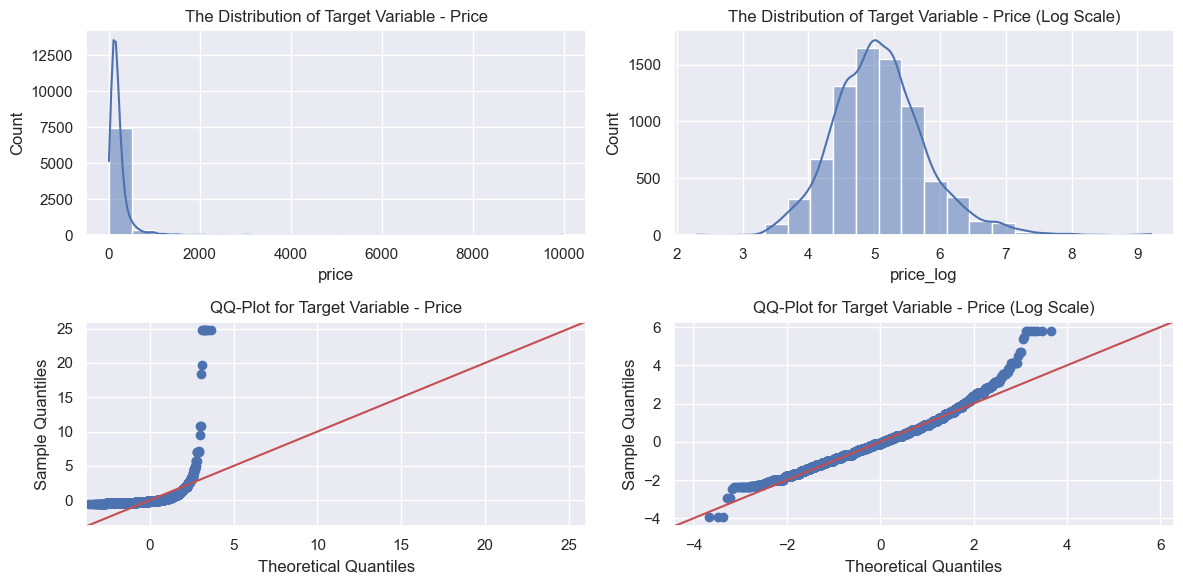

In [12]:
# Drop the only row with a null price before converting it to log scale
df_rentals.drop(df_rentals[(df_rentals["price"] == 0)].index,inplace =True)

# Initiate column for price in log scale
df_rentals["price_log"]=np.log(df_rentals["price"])

# Check outliers for both columns price_log and price
define_outliers(df_rentals,"price")
lower_price_outlier, upper_price_outlier = define_outliers(df_rentals,"price_log", log_scale = True)

# Check kurtosis value for both columns price_log and price. If kurtosis less than 3 then good indicator of normality distribution
print(f"Kurtosis value of price column : {kurtosis(df_rentals['price'])}")
print(f"Kurtosis value of price column in log scale : {kurtosis(df_rentals['price_log'])}")

# Distribution plots 
fig, axes = plt.subplots(2,2,figsize=(12,6))
sns.histplot(df_rentals["price"],ax=axes[0,0],bins = 20,kde = True).set(title='The Distribution of Target Variable - Price')
sns.histplot(df_rentals['price_log'],ax=axes[0,1],bins = 20,kde = True).set(title='The Distribution of Target Variable - Price (Log Scale)')
qqplot(df_rentals["price"],fit = True, line = "45",ax=axes[1,0])
qqplot(df_rentals["price_log"],fit = True, line = "45",ax=axes[1,1])
axes[1,0].set_title("QQ-Plot for Target Variable - Price")
axes[1,1].set_title("QQ-Plot for Target Variable - Price (Log Scale)")
plt.tight_layout()

The log transformation we applied on price column clearly show that price column in a log scale can be described as a normal distribution.<br>
2 evidences has been shown here:
- The Kurthosis value which is about 2 for price column in log scale. Recall that normal distributions tend to have a kurtosis near 3.
- QQ-plot of price in log scale which clearly track the straight line. Recall that for a qq-plot if points track along the straight line, they are normally distributed.
Given those evidence we decide to use price colum in a log scale for the developpement of our model because it is normally distributed.<br>
Use of price variable in a log scale will also be used for the definition of outliers. In fact IQR method will make us drop only 2% of our records instead of 7.2% if IQR method was used on price column without log transformation.

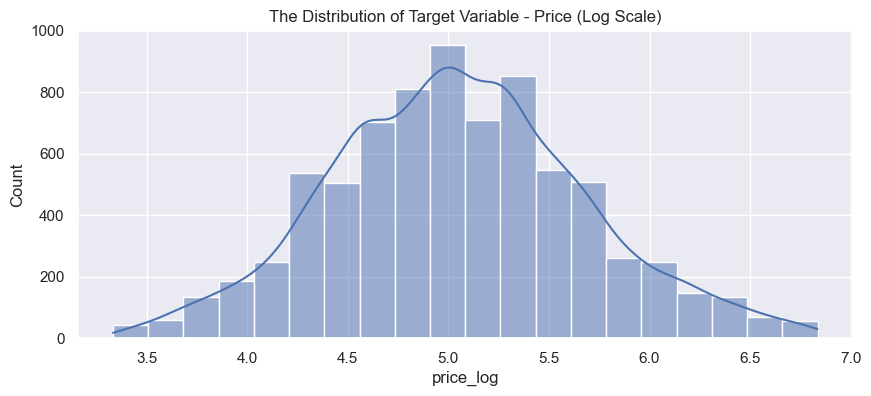

In [13]:
# Drop rows which are considered as outliers
df_rentals.drop(df_rentals[(df_rentals["price_log"] < lower_price_outlier)].index,inplace =True)
df_rentals.drop(df_rentals[(df_rentals["price_log"] > upper_price_outlier)].index,inplace =True)

# Update of the box plot for "price" column
plt.figure(figsize=(10, 4))
sns.histplot(df_rentals['price_log'],bins = 20,kde = True).set(title='The Distribution of Target Variable - Price (Log Scale)');

With this new distribution plot we clearly see that target variable price follows a normal distribution after a log transformation.

### Data Validation summary
This dataset initialy had 8111 rows and 9 columns.
I carried out the following actions in order to validate my dataset before Exploratory Analysis : 
- Set "id" column as the index column of the dataframe
- Drop one duplicated row
- Drop rows with NaN values from bedrooms and bathrooms columns.
- Drop rows corresponding to outliers for bathrooms and bedrooms columns.
- Convert price column into float values in log scale. After this transformation drop all outliers points calculated with IQR method. I also drop one row with a null price.
- Convert data type of the columns in order to optimize data storage
- Drop rows corresponding to long stays (i.e greater than 31 nights) for minimum_nights column

During this data validation, we also spot different inconsistencies between our subject and data collection :
- Professional renters are present in our data and they declare all the bathrooms in the hotel for one bedroom available which clearly implies that bathrooms number is not representative of the rented price.
- Some rented properties proposed more bathrooms than bedrooms which is in most case an inconsistency. For those properties bathrooms number is not representative of the rented price.
- Some rented properties proposed 0 bedrooms which seems impossible when renting. 

During our study, we tried to drop those rows, but it have tends to decrease model performance as it concerns a lot of data so we must keep it for our model development.

After those cleaning, we have a dataframe df_rentals with 7699 rows and 9 columns without any missing values or outliers.
In short, we drop about 5 % of our initial dataframe considering those data were not in the scope of our study and we add a column to get price in a log scale.

In [14]:
print(f"Shape of cleaned dataframe = {df_rentals.shape}")
print(df_rentals.describe())

Shape of cleaned dataframe = (7699, 9)
          latitude    longitude  ...        price    price_log
count  7699.000000  7699.000000  ...  7699.000000  7699.000000
mean     37.765438  -122.430455  ...   190.842577     5.046162
std       0.022920     0.027167  ...   136.920953     0.632863
min      37.704630  -122.513060  ...    28.000000     3.332205
25%      37.750910  -122.443115  ...   100.000000     4.605170
50%      37.768040  -122.425010  ...   150.000000     5.010635
75%      37.784925  -122.410705  ...   232.500000     5.448888
max      37.828790  -122.368570  ...   930.000000     6.835185

[8 rows x 7 columns]


# Exploratory Data analysis

### Continuous features variables - Latitude, Longitude

In order to check how numeric variables (i.e. latitude and longitude and price) are related to each other we first visualize the heatmap representing the correlation matrix of numeric features.

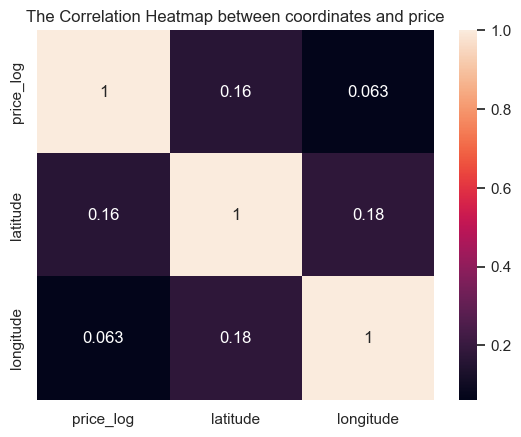

In [15]:
numeric = df_rentals[['price_log','latitude','longitude']]
sns.heatmap(numeric.corr(),annot=True).set(title='The Correlation Heatmap between coordinates and price');

From this plot, we can conclude there is a stronger positive correlation between price_log and latitude than between price_log and longitude. To better visualize this correlation, we could plot a scatter plot of each rentals properties with a color palette depending on the price.

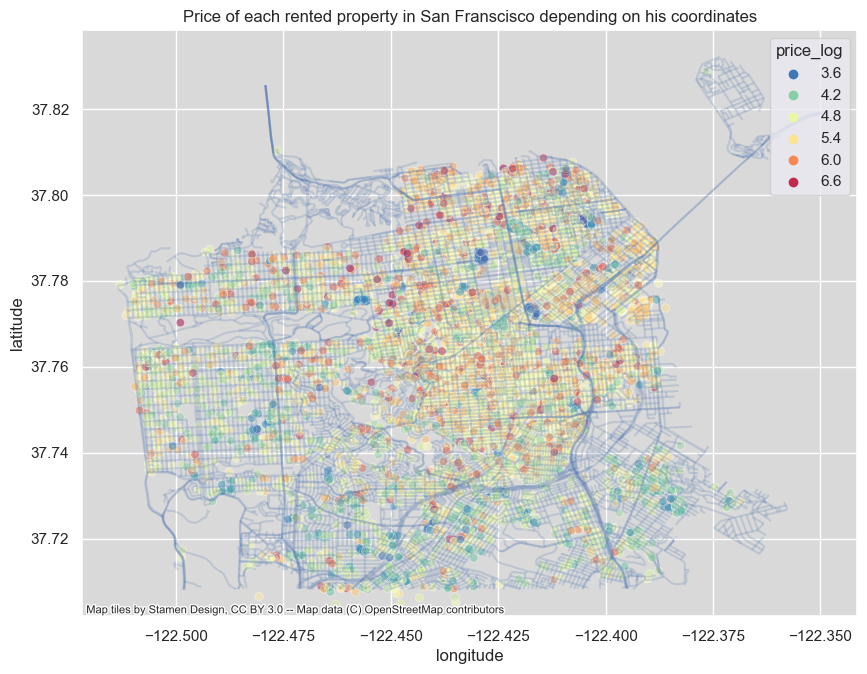

In [16]:
# Import necessary packages for scatter plot on a map
import geopandas as gpd
import contextily as ctx
from shapely.geometry import Point
# Create San Fransisco map of price depending on latitude and longitude 
# Import shapefile of San Franscico as GeoDataFrame
# File available at : https://www2.census.gov/geo/tiger/TIGER2017//ROADS/tl_2017_06075_roads.zip
geo_df = gpd.read_file('data/tl_2017_06075_roads.shx')
# Initiate our plot
fig, ax = plt.subplots(figsize=(10,10))
# Plot our San Franscico GeoDataFrame
geo_df.plot(ax=ax, alpha = .2)
# Add in a background using contextily
ctx.add_basemap(ax,source=ctx.providers.Stamen.TonerLite)
# Scatter plot of price depending on latitude and longitude over this map
sns.scatterplot(data = df_rentals, x="longitude",y="latitude", alpha = 0.5,hue = "price_log",palette = 'Spectral_r').set(title='Price of each rented property in San Franscisco depending on his coordinates')
# Display plot
plt.show()



As we can see on this map of San Franscisco, price seems equally distributed from west to east whereas price seems a little higher in the north than in south of the city. This is coherent with the correlation we have seen above.

### Categorical features variables - Property_type and Room_type

For categorical variables (i.e. Property_type and Room_type) we first want to check how their are related to price column in a log scale.



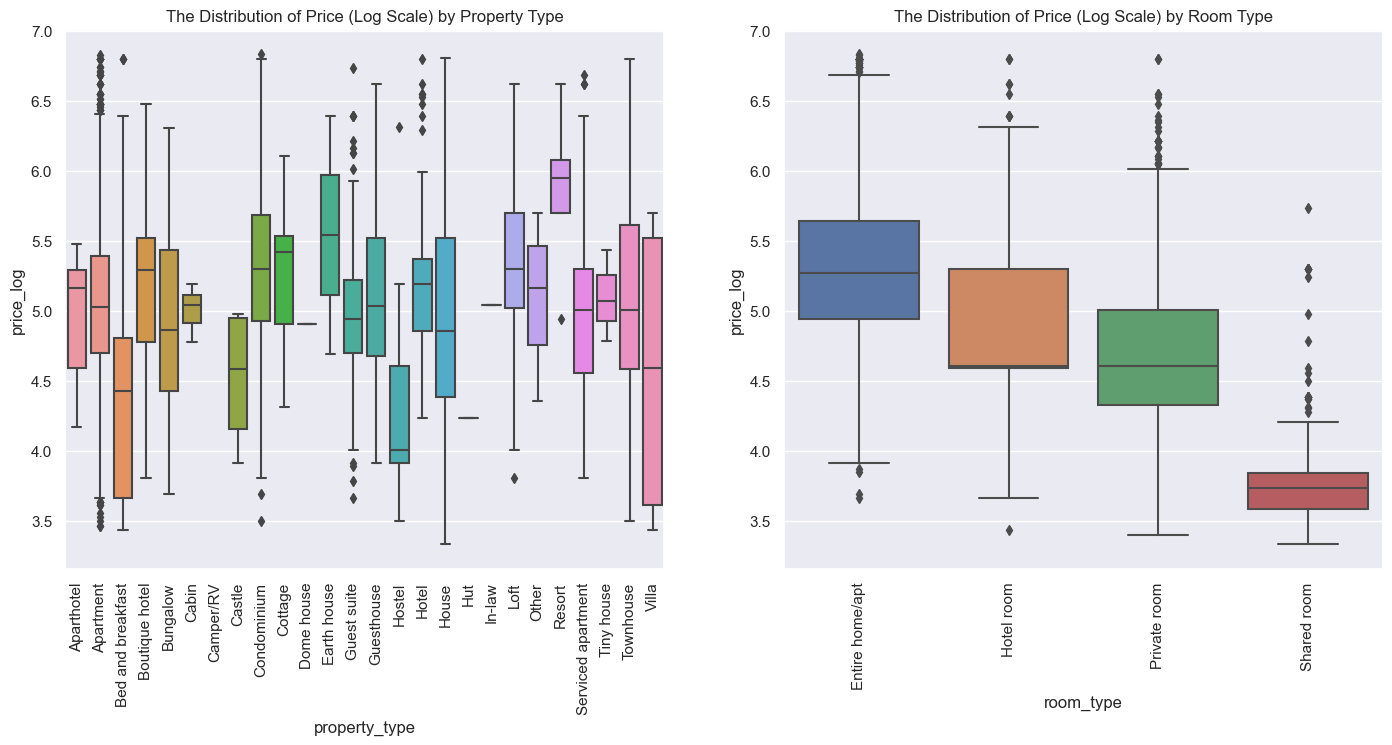

In [17]:
fig, axes = plt.subplots(1,2,figsize=(17,7))
sns.boxplot(data=df_rentals, x='property_type',y='price_log',ax=axes[0]).set(title='The Distribution of Price (Log Scale) by Property Type')
sns.boxplot(data=df_rentals, x='room_type',y='price_log',ax=axes[1]).set(title='The Distribution of Price (Log Scale) by Room Type')
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90);

From those box plot we can see there is a difference in distribution of prices among each categories in each variable which can be justified by the service and confort of the rented property. <br><br>
In particular we can see that : 
- Price decreases depending on privacy associated to room_type :
	- Shared room will be cheaper than Private room because clients will share the room where they sleep. 
    - Private room will be cheaper than Hotel room because clients will share bathrooms and toilets with others people. 
    - Hotel room will be cheaper than Entire Home given the fact client will share common part of the hotel (like the hotel reception) with others clients.
- Property_type variable doesn't seem to have a lot of influence on rented property price. 

### Discrete features variables - Bathrooms, Bedrooms, Minimum_nights

For discrete numeric variables (i.e. Bathrooms, Bedrooms and Minimum_nights) we first want to check how they are related to price in a log scale.

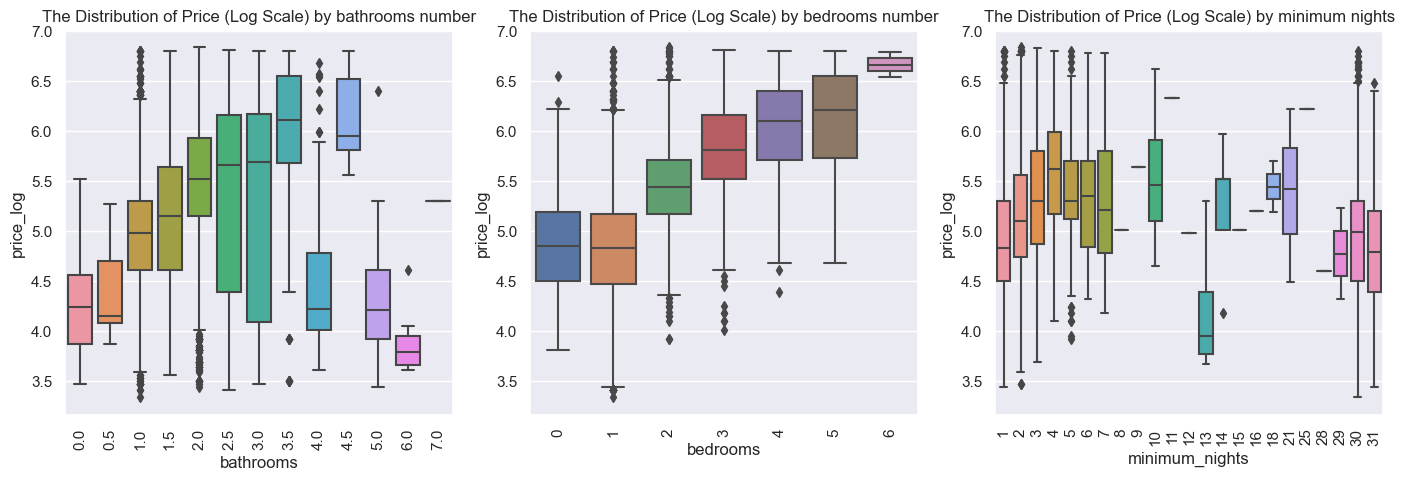

In [18]:
fig, axes = plt.subplots(1,3,figsize=(17,5))
sns.boxplot(data=df_rentals, x='bathrooms',y='price_log',ax=axes[0]).set(title='The Distribution of Price (Log Scale) by bathrooms number')
sns.boxplot(data=df_rentals, x='bedrooms',y='price_log',ax=axes[1]).set(title='The Distribution of Price (Log Scale) by bedrooms number')
sns.boxplot(data=df_rentals, x='minimum_nights',y='price_log',ax=axes[2]).set(title='The Distribution of Price (Log Scale) by minimum nights')
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90);

From those box plot we can clearly see a relation between bathrooms and bedrooms number with the price. The correlation is very intuitive : Renting price is higher for rented properties with more bathrooms and bedrooms. For rented properties which proposed more than 4 bathrooms we see that mean price decreased, which is due to professional renters as we explained before. We draw correlation matrix between price, bathrooms and bedrooms which show that there is a clear positive correlation between price and bedrooms whereas there is no correlation between bathrooms and price due to the inconsistency we explain above.<br>
For minimum_nights stays, there is no clear correlation between minimum_nights and price. However as mention before minimum_nights distribution is bimodal. We will check this point with two visualisations.

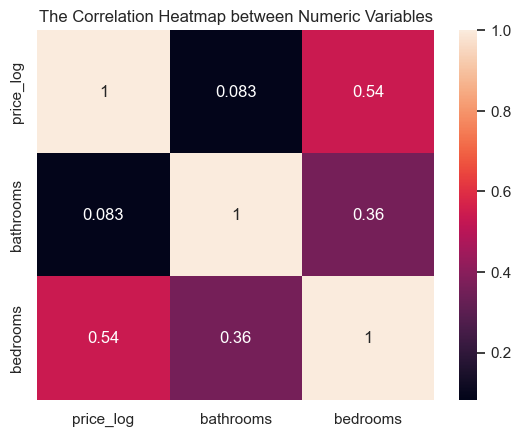

In [19]:
# Plot correlation heatmap between bathrooms, bedrooms and price (Log Scale)
rooms = df_rentals[['price_log','bathrooms','bedrooms']]
sns.heatmap(rooms.corr(),annot=True).set(title='The Correlation Heatmap between Numeric Variables');

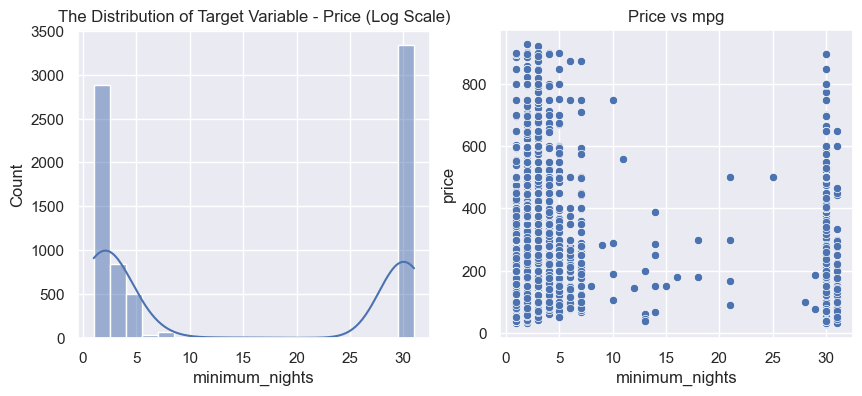

In [20]:
# Checking distribution of minimum_nights variable 
fig, axes = plt.subplots(1,2,figsize=(10,4))
sns.histplot(df_rentals['minimum_nights'],bins = 20,kde = True,ax=axes[0]).set(title='The Distribution of Target Variable - Price (Log Scale)');
sns.scatterplot(data = df_rentals, y='price',x='minimum_nights', ax = axes[1]).set(title='Price vs mpg');


Minimum nights follows a bimodal distribution with approximatively the same number of value between the two peaks. I found out there is clusters in the scatterplot between price and minimum_nights, so I decided to create a new ordinal variable from the minimum_night variable with two category : 0 for minimum_nights of 10 days or less. 1 for minimum_nights greater than 10 days.

In [21]:
# Convert minimum_nights variable into an ordinal variable
df_rentals.loc[(df_rentals['minimum_nights'] <= 10,'minimum_nights')] = 0
df_rentals.loc[(df_rentals['minimum_nights'] > 10,'minimum_nights')] = 1
df_rentals['minimum_nights'] = df_rentals['minimum_nights'].astype('int')

### Exploratory data summary
During this data exploration we found the following dependencies between variables :
- Price seems a little higher in the north than in south of the city : price is positively correlated to latitude variable whereas longitude doesn't have a lot of influence on the price.
- Price increase depending on privacy associated to room_type whereas property_type doesn't have a lot of influence on the price. 
- Price increase depending on the number of bedrooms proposed by rented properties whereas bathrooms number doesn't have a lot of influence.
- Minimum_nights variable follow a bimodal distribution with two equivalent peak, so we decided to create a new ordinal variable with two categories (10 days or less and more than 10 days) to facilitate model fitting.


# Model fitting & Evaluation

Predicting the price is a regression problem in machine learning. So I'm trying to develop different regression model and compare their performance for our problem :
- First I am choosing the Linear Regression model because we can see strong to moderate relationship between some features and target variable.
- Secondly I'll devellop XGBoost regression model because we have a large number of training samples (greater than 1000 training samples) and less than 100 features and we have a mixture of categorical and numeric features.
- Lastly I'll devellop a Decision Tree regression model because it is easy to interpret with independence from outliers.

For the evaluation of those models, I am choosing R squared and RMSE (Root Mean Squared Error) to evaluate the model.<br>
R squared is statistical measure that represents the proportion of the variance for a dependent variable that's explained by independents variables in a regression model. In short it measures how well the model fits dependent variables (i.e. features) R-squared values range from 0 to 1 and are commonly stated as percentages from 0% to 100%.
RMSE measures how much your predicted results deviate from the actual number. The objective for us is to have the lower value. Keep in mind that price is in log_scale which explain why we couldn't interpret directly RMSE measurements.

For each model development, I'll :
- Find best model parameters which a Randomized Search (except for linear regression which parameters cannot be tuned)
- Fetch features importances to understand how the model fit to our data and ensure consistency with the conclusions of data exploration.

In [22]:
# Import necessary packages for model fitting and evaluation
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb

#Setting seeed for reproductibility
np.random.seed(1)

### Prepare data for modelling

To enable modelling, we choose latitude, longitude, property_type, room_type, bathrooms, bedrooms and minimum_nights as features and price (in a log scale) as target variable. We must made the following changes before fitting our model : 
- Drop columns which will not be used in our model (i.e price),
- Convert categorical variables into numeric features,
- Split dataframe into X for features variables and y for the target variable,
- Normalize the numeric features with StandardScaler from sklearn.preprocessing,
- Split the data into a training set and a test set

In [23]:
# Drop column price from df_rentals and store the result in a new dataframe for model fitting
df_model = df_rentals.drop("price",axis = 1)

# Convert categorical variables into numeric features
labelencoder = LabelEncoder()
df_model['property_type'] = labelencoder.fit_transform(df_model['property_type'])
df_model['room_type'] = labelencoder.fit_transform(df_model['room_type'])

# Split dataframe into X for features variables and y for the target variable (price in a log scale)
feature_cols = ['latitude','longitude','property_type','room_type','bathrooms','bedrooms','minimum_nights']
X = df_model[feature_cols] # Features
y = df_model['price_log'] # Target variable

# Normalize numeric features with StandardScaler from sklearn
scaler = StandardScaler()
X[['latitude','longitude']] = scaler.fit_transform(X[['latitude','longitude']])

# With those changes, we now have a dataframe containing only integer or float value for feature variables
print(X.info())

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initiate dictionary to compare model performance and feature importance
metrics_summary = dict()
features_summary = dict()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7699 entries, 958 to 39354181
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   latitude        7699 non-null   float64
 1   longitude       7699 non-null   float64
 2   property_type   7699 non-null   int64  
 3   room_type       7699 non-null   int64  
 4   bathrooms       7699 non-null   float64
 5   bedrooms        7699 non-null   int64  
 6   minimum_nights  7699 non-null   int64  
dtypes: float64(3), int64(4)
memory usage: 481.2 KB
None


### Linear regression model

In [24]:
# Model developement and evaluation
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
metrics_summary["LinearRegression"] = [r2_score(y_test,y_pred),np.sqrt(mean_squared_error(y_test,y_pred))]
print('Linear Regression r2_score: ',metrics_summary["LinearRegression"][0])
print('Linear Regression Root Mean Squared Error: ',metrics_summary["LinearRegression"][1])

# Fetch features importance
importance = lr.coef_
resultdict = {}
for i in range(len(feature_cols)):
    resultdict[feature_cols[i]] = importance[i] 
features_summary["LinearRegression"] = resultdict

Linear Regression r2_score:  0.5671707009065473
Linear Regression Root Mean Squared Error:  0.414395835801501


### XGBoost Regressor

In [25]:
# Model developement and evaluation
xgb_cv = xgb.XGBRegressor()
xgb_param = {
             'learning_rate':  np.arange(0.01, 0.15, 0.02),
    		 'max_depth' : np.arange(11,15,1),
             'n_estimators' : np.arange(500,800,50),
             'subsample' : np.arange(0.05, 1.05, 0.05),
    		 'reg_lambda' : np.arange(5,10,1),
    		 'reg_alpha' : np.arange(5,10,1),
    		 'objective' : ["reg:squarederror","reg:logistic","reg:squaredlogerror"],
}
random_cv = RandomizedSearchCV(
                               estimator = xgb_cv,
                               param_distributions = xgb_param,
                               n_iter = 150,
                               scoring = 'neg_mean_absolute_percentage_error',
                               cv=4,
                               verbose =1
)
random_cv.fit(X_train,y_train)

# Fetching best model from Randomized Search CV
print(f"Best params from RandomizedSearchCV are {random_cv.best_params_}")
xgb_best = random_cv.best_estimator_
y_pred = xgb_best.predict(X_test)

# Calculate metrics
metrics_summary["XGBRegressor"] = [r2_score(y_test,y_pred),np.sqrt(mean_squared_error(y_test,y_pred))]
print('XGBRegressor Regression r2_score: ',metrics_summary["XGBRegressor"][0])
print('XGBRegressor Regression Root Mean Squared Error: ',metrics_summary["XGBRegressor"][1])

# Fetch features importance
importance = xgb_best.feature_importances_
resultdict = {}
for i in range(len(feature_cols)):
    resultdict[feature_cols[i]] = importance[i] 
features_summary["XGBRegressor"] = resultdict

Fitting 4 folds for each of 150 candidates, totalling 600 fits
Best params from RandomizedSearchCV are {'subsample': 0.8500000000000001, 'reg_lambda': 5, 'reg_alpha': 5, 'objective': 'reg:squarederror', 'n_estimators': 650, 'max_depth': 14, 'learning_rate': 0.06999999999999999}
XGBRegressor Regression r2_score:  0.6912493886080422
XGBRegressor Regression Root Mean Squared Error:  0.3499942988341673


### Decision Tree Regressor

In [26]:
# Model developement and evaluation
tree = DecisionTreeRegressor()
tree_grid = {'max_depth' : np.arange(1,15,2), 
    	     'splitter' :["best","random"],
           	 'min_samples_leaf':np.arange(1,10,1),
             'min_weight_fraction_leaf':np.arange(0.1,1.1,0.1),
             'max_features':["auto","log2","sqrt",None],
             'max_leaf_nodes':[None,10,20,30,40,50,60,70,80,90]
}
random_cv = RandomizedSearchCV(
                               estimator = tree,
                               param_distributions = tree_grid,
                               n_iter = 40,
                               scoring = 'r2',
                               cv=4,
                               verbose =1
)
random_cv.fit(X_train,y_train)

# Fetching best model from Randomized Search CV
print(f"Best params from RandomizedSearchCV are {random_cv.best_params_}")
tree_best = random_cv.best_estimator_
y_pred = tree_best.predict(X_test)

# Calculate metrics
metrics_summary["DecisionTreeRegressor"] = [r2_score(y_test,y_pred),np.sqrt(mean_squared_error(y_test,y_pred))]
print('DecisionTreeRegressor r2_score: ',metrics_summary["DecisionTreeRegressor"][0])
print('DecisionTreeRegressor Root Mean Squared Error: ',metrics_summary["DecisionTreeRegressor"][1])

# Fetch features importance
importance = tree_best.feature_importances_
resultdict = {}
for i in range(len(feature_cols)):
    resultdict[feature_cols[i]] = importance[i] 
features_summary["DecisionTreeRegressor"] = resultdict

Fitting 4 folds for each of 40 candidates, totalling 160 fits
Best params from RandomizedSearchCV are {'splitter': 'random', 'min_weight_fraction_leaf': 0.1, 'min_samples_leaf': 8, 'max_leaf_nodes': 50, 'max_features': None, 'max_depth': 13}
DecisionTreeRegressor r2_score:  0.4025810174328448
DecisionTreeRegressor Root Mean Squared Error:  0.48685155991531837


### Comparison on model development and performance

All metrics and feature importance have been extracted from the best model at each model development. Now we can displayed the following visualisations to discuss model performance.


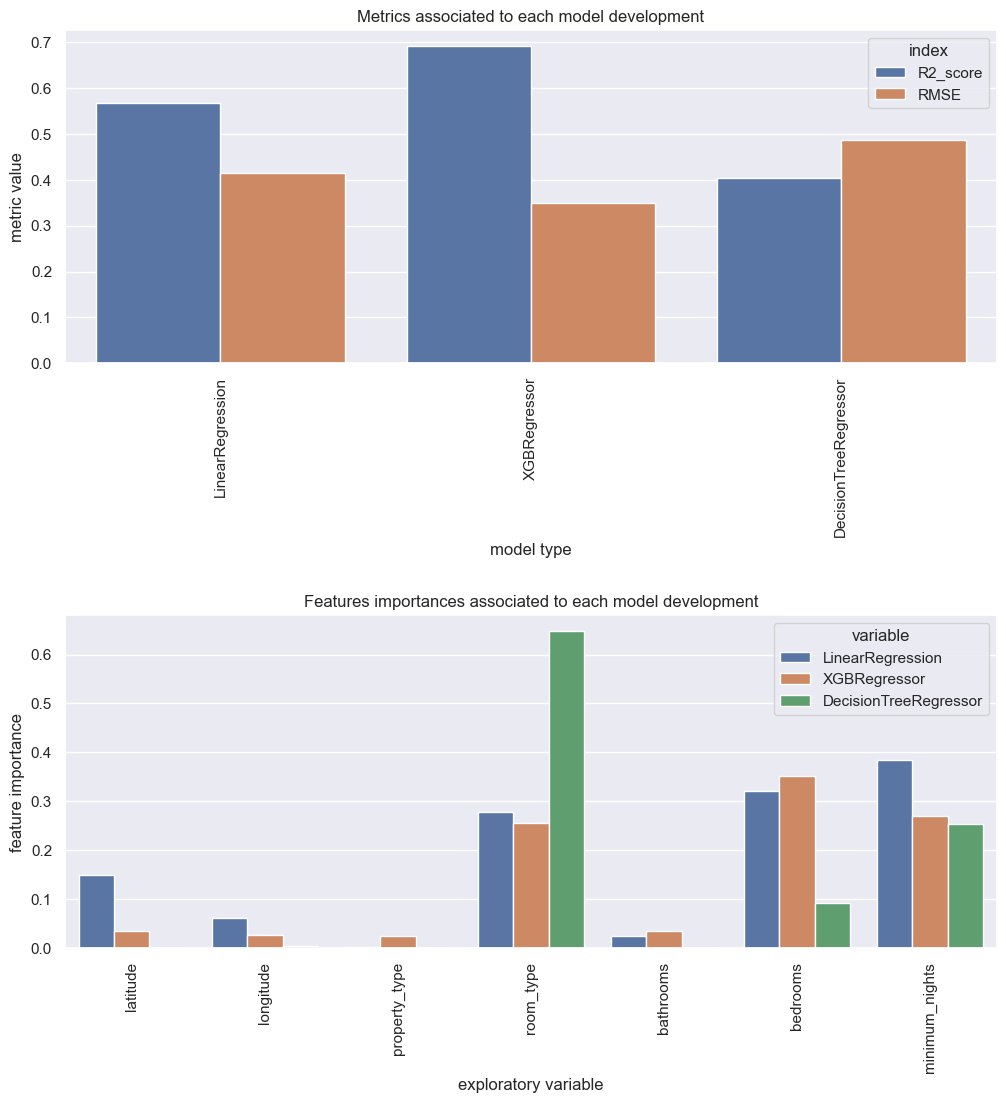

In [27]:
# Processing dictionnary metrics_summary
df_metrics = pd.DataFrame(metrics_summary,index = ["R2_score","RMSE"])
var_melting = list(df_metrics.columns)
df_metrics.reset_index(inplace = True)
df_metrics = pd.melt(df_metrics, id_vars='index', value_vars=var_melting)
# Processing dictionnary features_summary
df_features = pd.DataFrame(features_summary)
df_features = np.abs(df_features)
var_melting = list(df_features.columns)
df_features.reset_index(inplace = True)
df_features = pd.melt(df_features, id_vars='index', value_vars=var_melting)
# Plot visualisations to discuss model performance
fig, axes = plt.subplots(2,1,figsize=(10,10))
sns.barplot(x= "variable",y="value",hue = "index",data = df_metrics,ax=axes[0]).set(title='Metrics associated to each model development',xlabel='model type', ylabel='metric value')
sns.barplot(x= "index",y="value",hue = "variable",data = df_features,ax=axes[1]).set(title='Features importances associated to each model development',xlabel='exploratory variable', ylabel='feature importance')
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=11.0)
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90);


Metrics associated to each model development is very clear about model performance.<br>
Our best model is XGBoost regressor which lead to a R-Squared value of 0.69 which is the higher value we obtained during model development. This model is also the one with the smallest RMSE value which is coherent with the higher R-squared value. The second best model is the linear regression and the last one is the decision tree regressor.<br><br>
We can explained those differents performance with the feature importance associated to each model development.<br> For the worst model (i.e DecisionTreeRegressor) we can see only 3 explanatory variables are taken into account during model fitting (i.e minimum_nights, room_type and bedrooms). For Linear Regression model, property_type variable is not taken into account and features importance is not representative of the conclusion we have done during exploratory data analysis. For example, the most important feature for Linear Regression model is minimum_nights which haven't shown a clear correlation with price.<br><br>
In short the best model is the one which take into account all features and have features importances consistent with the exploratory Data analysis.<br>
For the rest of our study we will only consider the XGBoostRegressor we have develop.

In [28]:
model = xgb.XGBRegressor(subsample = 0.85, reg_lambda = 5, reg_alpha= 5, n_estimators = 650, max_depth= 14,
                             learning_rate=0.07, objective = "reg:squarederror")
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

# Results

### Comparison between predicted and actual price
Now, we have our model, we will discuss his performance for predicting price of rented properties. We propose 2 visualisations to discuss his performance on predicting price :
- Actual price versus predicted price. This graphic will represent the dispersion of point around the equality line which represent a perfect prediction. With this chart we clearly see that true price versus predicted price globally follows the equality line but there is a lot of dispersion around this line which indicate a low performance of the model.
- Actual and predicted price versus rank of the predicted price in dollars. This plot show the same conclusion, the model predict quite weel rented price. However the actual price have a large range of value for a given predicted price which will lead to low performance compared to business metrics.


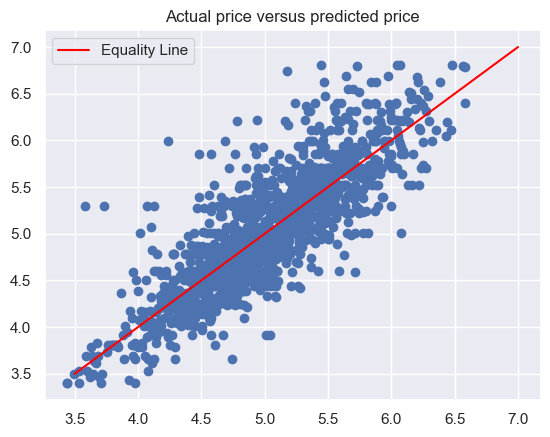

In [29]:
plt.scatter(y_pred,y_test)
plt.plot([3.5,7],[3.5,7], color="red", label = "Equality Line")
plt.title("Actual price versus predicted price")
plt.legend();

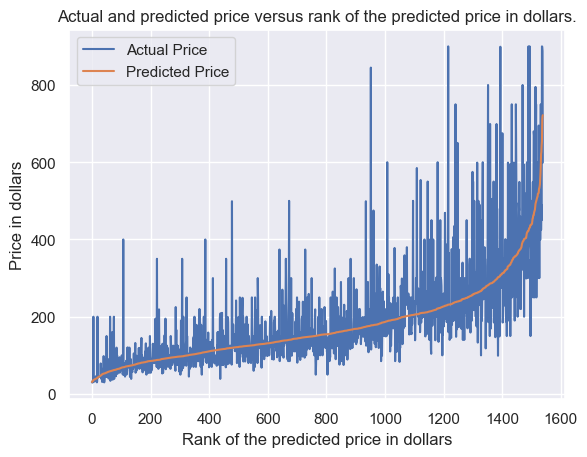

In [30]:
df_prices = pd.DataFrame({"y_pred":y_pred,"y_test":y_test})
df_prices = np.exp(df_prices)
df_prices = df_prices.sort_values(by="y_pred").reset_index()
plt.plot(df_prices["y_test"], label = "Actual Price")
plt.plot(df_prices["y_pred"], label="Predicted Price")
plt.title("Actual and predicted price versus rank of the predicted price in dollars.")
plt.xlabel("Rank of the predicted price in dollars")
plt.ylabel("Price in dollars")
plt.legend();

### Model evaluation by business criteria

The company 1nn the Neighborhood wants to avoid estimating prices that are more than 25 dollars off of the actual price, as this may discourage people. Therefore, we would consider using percentage of predictions which predicted price is not more than $25 higher or lower than actual price as a KPI to compare models we develop previously for our problem. The higher the percentage, the better the model performs. Price which respect this limit will be named "Right prediction" otherwise it will be named "Wrong prediction". We propose to include the basic Linear Regression for this comparison to understand how well our XGBoost Regressor model perform.

Mean prediction error from XGBoost Regressor model = 51.1158812064629$

Mean prediction error from Linear regression model = 60.28982173396117$



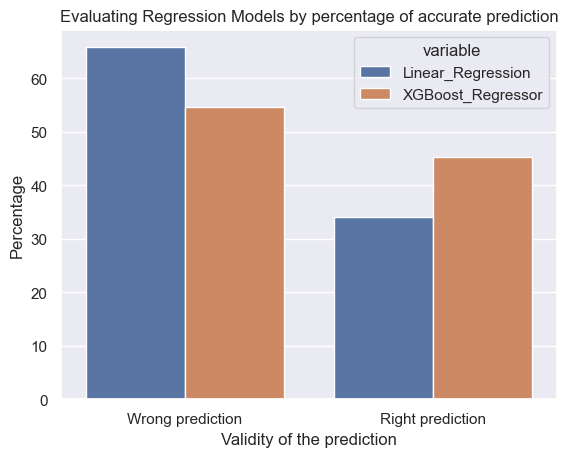

In [31]:
# Make predictions again for our two selected model
y_pred_linear = lr.predict(X_test)
y_pred_xgb = y_pred

# Create a function which add columns in the dataframe classifying predictions based on criterion value.
def classify_predictions(df,criterion):
	df["success_criterion_linear"] = df["diff_price_from_linear"] <= criterion
	df["success_criterion_xgb"] = df["diff_price_from_xgb"] <= criterion
	df["category_linear"] = df["success_criterion_linear"].apply(lambda x: 'Right prediction' if x == True else 'Wrong prediction')
	df["category_xgb"] = df["success_criterion_xgb"].apply(lambda x: 'Right prediction' if x == True else 'Wrong prediction')
	return df
    

# Create the KPI Dataframe to compare model performance to business criteria
limit_criteria = 25
kpi = pd.DataFrame()
kpi["actual_price_log"] = y_test
kpi["actual_price"] = np.exp(kpi["actual_price_log"])
kpi["price_from_linear"] = np.exp(y_pred_linear)
kpi["price_from_xgb"] = np.exp(y_pred_xgb)
kpi["diff_price_from_linear"] = np.abs(kpi["actual_price"] - kpi["price_from_linear"])
kpi["diff_price_from_xgb"] = np.abs(kpi["actual_price"] - kpi["price_from_xgb"])
kpi = classify_predictions(kpi,25)
kpi_plot = pd.DataFrame({"Linear_Regression":kpi["category_linear"].value_counts(normalize=True), "XGBoost_Regressor":kpi["category_xgb"].value_counts(normalize=True)})*100
var_melting = list(kpi_plot.columns)
kpi_plot.reset_index(inplace = True)
kpi_plot = pd.melt(kpi_plot, id_vars='index', value_vars=var_melting)

# Plot model performance to business criteria
sns.barplot(x= "index",y="value",hue = "variable",data = kpi_plot).set(title='Evaluating Regression Models by percentage of accurate prediction', xlabel = "Validity of the prediction", ylabel = "Percentage");

# Display what's the average prediction error
print(f'Mean prediction error from XGBoost Regressor model = {kpi["diff_price_from_xgb"].mean()}$\n')
print(f'Mean prediction error from Linear regression model = {kpi["diff_price_from_linear"].mean()}$\n')


Both model (XGBRegressor and Linear Regression) failed to fulfill the success criteria of predicting prices that are less than 25 dollars off the actual price. XGBoost regressor model predicts prices that are on an average $51 away from actual prices.
We now propose to study the evolution of right prediction if the tolerate error increase. We propose the following line plot

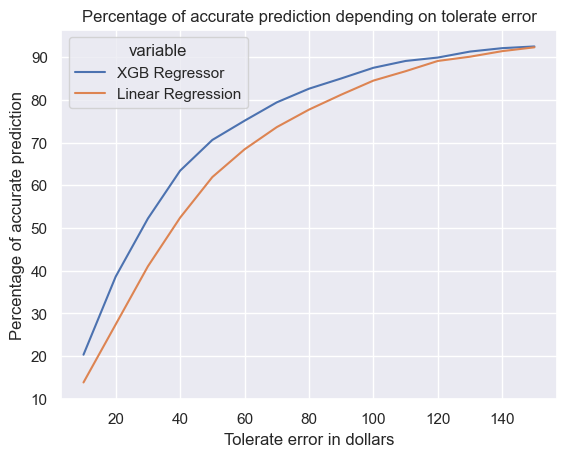

In [32]:
#  Prepare data for line plot
kpi_xgb_regressor = list()
kpi_linear_regression = list()
for tolerate_error in np.arange(10,160,10):
	kpi = classify_predictions(kpi,tolerate_error)
	kpi_xgb_regressor.append(np.round(kpi["category_xgb"].value_counts(normalize=True)["Right prediction"],3))
	kpi_linear_regression.append(np.round(kpi["category_linear"].value_counts(normalize=True)["Right prediction"],3))
# Convert values to percentage
kpi_xgb_regressor = np.array(kpi_xgb_regressor)*100
kpi_linear_regression = np.array(kpi_linear_regression)*100

# Creating line plot for both models
df_plot = pd.DataFrame({"Tolerate error":np.arange(10,160,10),"XGB Regressor":kpi_xgb_regressor,"Linear Regression":kpi_linear_regression})
sns.lineplot(x='Tolerate error', y='value', hue='variable',data=pd.melt(df_plot,['Tolerate error'])).set(title='Percentage of accurate prediction depending on tolerate error',xlabel='Tolerate error in dollars', ylabel='Percentage of accurate prediction');


Both model clearly show low performance compared to our sucess criteria. However if the product manager is willing to lower the success criteria to 60$ we will be able to predict correctly 75% of rented property price with our XGBoost Regressor model.

# Conclusion and recommandations

### Conclusion on model development compared to business problem
The objective of this project was to develop a model that predict the price of rented properties on the online platform 1nn the Neighborhood.<br>
Despite data cleaning and validation, we failed to produce a model that respect the success criteria of predicting price that are less than 25\$ off the actual price. Our best model XGBoost Regressor predicts prices that are on an average 51\$ away from actual prices.<br>
However, we produce a model that could predict correctly 75% of the price of our platform if the product manager is willing to lower the success criteria to 60$.

### Recommandations for future action


Given our data analysis and model development, we propose the following recommendations for future action :
- Assess data quality before collecting it . There are several inconsistancies in the dataset that could be corrected during data collection which will greatly increase our model performance : 
	- Some renters propose 0 bedroom when renting their property and that seems impossible.
    - Some renters are professionals (ApartHotel, Bed and BreakFast, Boutique hotel, Hostel and Hotel) as we demonstrate during data exploration. As our platform is destinated to people who want to rent their own properties, professional renters shouldn’t be include in our dataset.
    - Bathrooms variable is not really representative of the price because sometimes renters propose all the bathrooms in the properties even if they are common bathrooms.
    - Property type variable is too scattered. This variable is divided into 26 type, some of which contain less than 5 elements. (Camper/RV, In-law, Dome house, Hut etc…). Therefore there is a need to reduce the categories proposed for property type in order to make this variable relevant for our model development.
- Create more meaningful features from rented properties during data collection. For example, we could have in our model a variable that describe the state of use of the property. This variable could explain price variation between two equivalent properties (in terms of bathrooms and bedrooms number)
- Collect more data. During our analysis we try to drop the rows which correspond to inconsistancies as describe before. This has always significantly decrease our model performance. This implies we should collect more data in order to make our model more robust.
 